In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('API_Trend.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%y')

df = data

df['SUM_COUNT'] = df.groupby(['DATE','APPNAME', 'API'])['COUNT'].transform('sum')
df_gp = df.drop_duplicates(subset=['DATE','APPNAME', 'API'])
df_gp.drop(['COUNT', 'STATUS'], axis=1, inplace=True)
df_gp = df_gp.reset_index(drop=True)


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\2297918090.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gp.drop(['COUNT', 'STATUS'], axis=1, inplace=True)


In [3]:
df_gp.sort_values(by=['APPNAME'], inplace=True)
applist = df_gp['APPNAME'].unique()
apilist = []
for i in applist:
    apilist.append(df_gp[df_gp['APPNAME']==i]['API'].unique())


In [4]:
pro_df_list = []

for i, appname in enumerate(applist):
    for j, api_names in enumerate(apilist[i]):
        
        ind_df = df_gp[(df_gp['APPNAME']==appname) & (df_gp['API']==api_names)]
        zs = zscore(ind_df['SUM_COUNT'])
        ind_df['ZS'] = zs

        Outlier = pd.Series([0]*len(ind_df), index=ind_df.index)
        Outlier[zs>=3] = 1
        Outlier[zs<=-3] = 1
        ind_df['OUTLIER'] = Outlier
        pro_df_list.append(ind_df)

pro_df = pd.concat(pro_df_list)

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\2538022293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['ZS'] = zs
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\2538022293.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_df['OUTLIER'] = Outlier
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\2538022293.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [5]:
pro_data = pro_df_list[94].copy()
le = LabelEncoder()
pro_data['APPNAME'] = le.fit_transform(pro_data['APPNAME'])
pro_data['API'] = le.fit_transform(pro_data['API'])
pro_data.sort_values(by=['DATE'], inplace=True)
dl = pro_data['DATE'].unique()

print(pro_data.isnull().sum())
pro_data = pro_data.dropna()

DATE         0
APPNAME      0
API          0
SUM_COUNT    0
ZS           0
OUTLIER      0
dtype: int64


In [6]:
pro_df_dict = {}
for b in range(0,len(pro_df_list)):
    app_name = pro_df_list[b]['APPNAME'].unique()
    api_name = pro_df_list[b]['API'].unique()
    en = app_name + '-' + api_name
    pro_df_dict[b] = en
print(pro_df_dict)

# list out keys and values separately
key_list = list(pro_df_dict.keys())
val_list = list(pro_df_dict.values())

position = val_list.index('App1-API18')
print(key_list[position])

{0: array(['App1-API18'], dtype=object), 1: array(['App1-API19'], dtype=object), 2: array(['App10-API24'], dtype=object), 3: array(['App10-API10'], dtype=object), 4: array(['App10-API12'], dtype=object), 5: array(['App10-API9'], dtype=object), 6: array(['App100-API24'], dtype=object), 7: array(['App100-API17'], dtype=object), 8: array(['App100-API18'], dtype=object), 9: array(['App100-API19'], dtype=object), 10: array(['App100-API26'], dtype=object), 11: array(['App100-API7'], dtype=object), 12: array(['App100-API15'], dtype=object), 13: array(['App101-API15'], dtype=object), 14: array(['App102-API15'], dtype=object), 15: array(['App103-API19'], dtype=object), 16: array(['App103-API18'], dtype=object), 17: array(['App104-API15'], dtype=object), 18: array(['App104-API19'], dtype=object), 19: array(['App104-API18'], dtype=object), 20: array(['App105-API15'], dtype=object), 21: array(['App106-API2'], dtype=object), 22: array(['App106-API15'], dtype=object), 23: array(['App106-API10'], dty

In [7]:
pro_df_list[0]

,DATE,APPNAME,API,SUM_COUNT,ZS,OUTLIER
0,2023-07-04,App1,API18,8,-0.316085,0
4484,2023-07-19,App1,API18,7,-0.335557,0
8660,2023-08-02,App1,API18,11,-0.257670,0
18721,2023-09-05,App1,API18,15,-0.179782,0
11631,2023-08-12,App1,API18,15,-0.179782,0
...,...,...,...,...,...,...
16043,2023-08-27,App1,API18,7,-0.335557,0
1197,2023-07-08,App1,API18,17,-0.140838,0
1492,2023-07-09,App1,API18,25,0.014937,0
3004,2023-07-14,App1,API18,23,-0.024006,0


In [8]:
predict_anomaly_list = [] 

In [9]:
final_list = []
for a in range(0, len(pro_df_list)):
    pro_data = pro_df_list[a].copy()
    le = LabelEncoder()
    pro_data['APPNAME'] = le.fit_transform(pro_data['APPNAME'])
    pro_data['API'] = le.fit_transform(pro_data['API'])
    pro_data.sort_values(by=['DATE'], inplace=True)
    dl = pro_data['DATE'].unique()

    #print(pro_data.isnull().sum())
    pro_data = pro_data.dropna()

    df_train = pro_data[pro_data['DATE']<'2023-09-01']
    df_test = pro_data[(pro_data['DATE']>='2023-09-01')]
    df_train.drop(['DATE'], axis=1, inplace=True)
    df_train.drop(['ZS'], axis=1, inplace=True)
    df_test.drop(['DATE'], axis=1, inplace=True)
    df_test.drop(['ZS'], axis=1, inplace=True)
    
    an_train = df_train['OUTLIER']
    an_test = df_test['OUTLIER']
    
    df_train.drop(['OUTLIER'], axis=1, inplace=True)
    df_test.drop(['OUTLIER'], axis=1, inplace=True)

    if (len(df_train)!=0) & (len(df_test)!=0):
        # Isolation Forest
        iso_forest = IsolationForest(contamination=0.01)
        iso_forest.fit(df_train, an_train)

        y_pred_iso = iso_forest.predict(df_test)  # predicted labels
        y_pred_iso_map = np.where(y_pred_iso == -1, 1, 0)

        print(classification_report(an_test, y_pred_iso_map))  # Isolation forest report

        cm_iso = confusion_matrix_iso = pd.crosstab(an_test, y_pred_iso_map, rownames=['Actual'], colnames=['Predicted'])
        print(confusion_matrix_iso)

        df_final = df_test.copy()
        df_final['OUTLIER'] = y_pred_iso_map
        df_f_w = df_final[df_final['OUTLIER']==1]

        ind_df_f = pro_df_list[a].copy()
        ind_df_f = ind_df_f[(ind_df_f['DATE']>='2023-09-01') & (ind_df_f['DATE']<='2023-09-19')]
        ind_df_f.drop(['OUTLIER'], axis=1, inplace=True)
        ind_df_f['OUTLIER'] = df_final.loc[ind_df_f.index]['OUTLIER']
        li = ind_df_f['APPNAME'].index

        if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
            final_list.append(pro_df_dict[a])
            predict_anomaly_list.append(ind_df_f)
            print(ind_df_f)
            #plt.figure(figsize=(10, 5))
            #sns.scatterplot(data=ind_df_f, x='DATE', y='SUM_COUNT', hue=ind_df_f.OUTLIER.astype(bool), palette=['green', 'red'])
            #plt.title(str(pro_df.loc[li[0]]['APPNAME']) + ' ' + str(pro_df.loc[li[0]]['API']))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Predicted   0
Actual       
0          14


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Predicted  0
Actual      
0          4


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Predicted   0
Actual       
0          18


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Predicted   0
Actual       
0          17
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Act

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  1
Actual      
1          2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Predicted   0
Actual       
0          10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19

Predicted   0
Actual       
0          18
1

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted  0
Actual      
0          8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Predicted   0
Actual       
0          10


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:24: SettingWithCopy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Predicted   0
Actual       
0          17


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2

Predicted  0  1
Actual         
0          1  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted  0
Actual      
0          8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted  0
Actual      
0          8
 

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0     

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:23: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00         2

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          17  0
1           0  2
            DATE APPNAME    API  SUM_COUNT        ZS  OUTLIER
19072 2023-09-06   App17  API15      61763 -0.398454        0
20532 2023-09-11   App17  API15      52955 -1.330409        0
19367 2023-09-07   App17  API15      73773  0.872296        0
21115 2023-09-13   App17  API15      66097  0.060116        0
19950 2023-09-09   App17  API15      63615 -0.202498        0
20240 2023-09-10   App17  API15      73811  0.876317        0
19660 2023-09-08   App17  API15      57050 -0.897126        0
20827 2023-09-12   App17  API15      56482 -0.957225        0
21411 2023-09-14   App17  API15      65849  0.0

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       0.00      0.00      0.00         3

    accuracy                           0.84        19
   macro avg       0.42      0.50      0.46        19
weighted avg       0.71      0.84      0.77        19

Predicted   0
Actual       
0          16
1

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19

Predicted   0
Actual       
0          18
1           1
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19

Predicted   0  1
Actual          
0          16  2
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weig

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.50      1.00      0.67         1

    accuracy                           0.95        19
   macro avg       0.75      0.97      0.82        19
weighted avg       0.97      0.95      0.96        19

Predicted   0  1
Actual          
0          17  1
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Predicted  0
Actual      
0          4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        19
           1       0.00      0.00      0.00         0

    accuracy                           0.42        19
   macro avg       0.50      0.21      0.30        19
weighted avg       1.00      0.42      0.59        19

Predicted  0   1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.33      1.00      0.50         1

    accuracy                           0.87        15
   macro avg       0.67      0.93      0.71        15
weighted avg       0.96      0.87      0.89        15

Predicted   0  1
Actual          
0          12  2
1           0  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19

Predicted   0
Actual       
0          18
1           1
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       0.00      0.00      0.00         1

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19

Predicted   0
Actual       
0          18
1           1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg    

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       0.60      1.00      0.75         3

    accuracy                           0.89        19
   macro avg       0.80      0.94      0.84        19
weighted avg       0.94      0.89      0.90        19

Predicted   0  1
Actual          
0          14  2
1           0  3
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.00      0.00      0.00         0

    accuracy                           0.62         8
   macro avg       0.50      0.31      0.38         8
weighted avg       1.00      0.62      0.77         8

Predicted  0  1
Actual         
0          5  3


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:24: SettingWithCopy

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.00      0.00      0.00         0

    accuracy                           0.94        16
   macro avg       0.50      0.47      0.48        16
weighted avg       1.00      0.94      0.97        16

Predicted   0  1
Actual          
0          15  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Predicted   0
Actual       
0     

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       0.00      0.00      0.00         2

    accuracy                           0.89        18
   macro avg       0.44      0.50      0.47        18
weighted avg       0.79      0.89      0.84        18

Predicted   0
Actual       
0          16
1           2
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.50      1.00      0.67         1

    accuracy                           0.95        19
   macro avg       0.75      0.97      0.82        19
weighted avg       0.97      0.95      0.96        19

Predicted   0  1
Actual          
0          17  1
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weig

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.17      1.00      0.29         1

    accuracy                           0.74        19
   macro avg       0.58      0.86      0.56        19
weighted avg       0.96      0.74      0.81        19

Predicted   0  1
Actual          
0          13  5
1           0  1
              precision    recall  f1-score   support

           0       1.00      0.18      0.30        17
           1       0.12      1.00      0.22         2

    accuracy                           0.26        19
   macro avg       0.56      0.59      0.26        19
weighted avg      

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.40      1.00      0.57         2

    accuracy                           0.84        19
   macro avg       0.70      0.91      0.74        19
weighted avg       0.94      0.84      0.87        19

Predicted   0  1
Actual          
0          14  3
1           0  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Predicted  0
Actual      
0          3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0     

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted  0
Actual      
0          9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Predicted   0
Actual       
0          14
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Predicted  0
Actu

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.00      0.00      0.00         0

    accuracy                           0.89        19
   macro avg       0.50      0.45      0.47        19
weighted avg       1.00      0.89      0.94        19

Predicted   0  1
Actual          
0          17  2
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.00      0.00      0.00         2

    accuracy                           0.89        19
   macro avg       0.45      0.50      0.47        19
weighted avg       0.80      0.89      0.85        19

Predicted   0
Actual       
0          17
1           2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Predicted  0
Actual      
0          5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Predicted   0
Actual       
0          14


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Predicted   0
Actual       
0          15
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.00      0.00      0.00         0

    accuracy                           0.89        19
   macro avg       0.50      0.45      0.47        19
weighted avg       1.00      0.89      0.94        19

Predicted   0  1
Actual          
0          17  2


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.00      0.00      0.00         0

    accuracy                           0.55        11
   macro avg       0.50      0.27      0.35        11
weighted avg       1.00      0.55      0.71        11

Predicted  0  1
Actual         
0          6  5
            DATE APPNAME   API  SUM_COUNT        ZS  OUTLIER
22699 2023-09-18   App57  API7          8 -0.200584        0
18604 2023-09-04   App57  API7          9 -0.106432        0
22986 2023-09-19   App57  API7         20  0.929236        1
19489 2023-09-07   App57  API7          8 -0.200584        0
20949 2023-09-12   App57  API7         31  1.964904        1
19196 2023-09-06   App57  API7         19  0.835084        1
21238 2023-09-13   App57  API7          7 -0.294736        0
21533 2023-09-14   App57  API7         32  2.059056        1
18898 2023-09-05   App57  API7         39  2.718118        1
20658 2023-09-1

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.68      0.81        19
           1       0.00      0.00      0.00         0

    accuracy                           0.68        19
   macro avg       0.50      0.34      0.41        19
weighted avg       1.00      0.68      0.81        19

Predicted   0  1
Actual          
0          13  6
            DATE APPNAME    API  SUM_COUNT        ZS  OUTLIER
19207 2023-09-06   App60  API15      35825  0.541129        0
20376 2023-09-10   App60  API15      38865  1.304421        0
17717 2023-09-01   App60  API15      31785 -0.473246        0
19794 2023-09-08   App60  API15      35971  0.577787        0
18019 2023-09-02   App60  API15      35484  0.455509        0
18315 2023-09-03   App60  API15      36006  0.586575        0
19500 2023-09-07   App60  API15      36019  0.589839        0
22126 2023-09-16   App60  API15      39904  1.565296        1
18909 2023-09-05   App60  API15      35752  0.522800        0
22

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.00      0.00      0.00         0

    accuracy                           0.89        19
   macro avg       0.50      0.45      0.47        19
weighted avg       1.00      0.89      0.94        19

Predicted   0  1
Actual          
0          17  2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       0.00      0.00      0.00         2

    accuracy                           0.89        19
   macro avg       0.45      0.50      0.47        19
weighted avg       0.80      0.89      0.85        19

Predicted   0
Actual       
0          17
1           2


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        19
           1       0.00      0.00      0.00         0

    accuracy                           0.42        19
   macro avg       0.50      0.21      0.30        19
weighted avg       1.00      0.42      0.59        19

Predicted  0   1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Predicted  0
Actu

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Predicted  0
Actual      
0          2
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.50      1.00      0.67         1

    accuracy                           0.94        18
   macro avg       0.75      0.97      0.82        18
weighted avg       0.97      0.94      0.95        18

Predicted   0  1
Actual          
0          16  1
1           0  1


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.00      0.00      0.00         0

    accuracy                           0.63        19
   macro avg       0.50      0.32      0.39        19
weighted avg       1.00      0.63      0.77        19

Predicted   0  1
Actual          
0          12  7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0     

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.00      0.00      0.00         0

    accuracy                           0.84        19
   macro avg       0.50      0.42      0.46        19
weighted avg       1.00      0.84      0.91        19

Predicted   0  1
Actual          
0          16  3


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.00      0.00      0.00         0

    accuracy                           0.94        18
   macro avg       0.50      0.47      0.49        18
weighted avg       1.00      0.94      0.97        18

Predicted   0  1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Predicted   0
Actual       
0          17
              precision    recall  f1-score   support

           0       1.00      0.11      0.19        19
           1       0.00      0.00      0.00         0

    accuracy                           0.11        19
   macro avg       0.50      0.05      0.10        19
weighted avg       1.00      0.11      0.19        19

Predicted  0   1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Predicted  0
Actual      
0          6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0     

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.00      0.00      0.00         1

    accuracy                           0.88         8
   macro avg       0.44      0.50      0.47         8
weighted avg       0.77      0.88      0.82         8

Predicted  0
Actual      
0          7
1          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00  

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Predicted  0
Actual      
0          5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Predicted   0
Actual       
0          18


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Predicted   0
Actual       
0          11
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

Predicted   0
Actual       
0          18
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0        

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.50      1.00      0.67         1

    accuracy                           0.95        19
   macro avg       0.75      0.97      0.82        19
weighted avg       0.97      0.95      0.96        19

Predicted   0  1
Actual          
0          17  1
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

Predicted   0
Act

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted  0  1
Actual         
0          8  0
1          0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Predicted  0
Actual  

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         1

    accuracy                           0.89         9
   macro avg       0.44      0.50      0.47         9
weighted avg       0.79      0.89      0.84         9

Predicted  0
Actual      
0          8
1          1
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12

Predicted   0
Actual       
0          11
1           1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         1

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Predicted  0  1
Actual         
0          8  0
1          0  1
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.00      0.00      0.00         0

    accuracy                           0.89         9
   macro avg 

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        19
           1       0.00      0.00      0.00         0

    accuracy                           0.74        19
   macro avg       0.50      0.37      0.42        19
weighted avg       1.00      0.74      0.85        19

Predicted   0  1
Actual          
0          14  5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Predicted  0
Actual      
0       

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

Predicted  0  1
Actual         
0          4  1
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.00      0.00      0.00         0

    accuracy                           0.80         5
   macro avg       0.50      0.40      0.44         5
weighted avg       1.00      0.80      0.89         5

Predicted  0  1
Actual         
0          4  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.0

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      19.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      19.0
   macro avg       0.00      0.00      0.00      19.0
weighted avg       0.00      0.00      0.00      19.0

Predicted   1
Actual       
0          19
            DATE APPNAME    API  SUM_COUNT        ZS  OUTLIER
20445 2023-09-10   App89  API15        401  1.387291        1
18089 2023-09-02   App89  API15        525  2.010717        1
20739 2023-09-11   App89  API15        394  1.352097        1
17793 2023-09-01   App89  API15        243  0.592925        1
18685 2023-09-04   App89  API15        315  0.954915        1
22199 2023-09-16   App89  API15        493  1.849833        1
22777 2023-09-18   App89  API15        452  1.643700        1
18985 2023-09-05   App89  API15        405  1.407401        1
22485 2023-09-17   App89  API15        471  1.739225        1
21323 2023-

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0     

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19


C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0          18  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      19.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      19.0
   macro 

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Predicted   0
Actual       
0          15
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.00      0.00      0.00         0

    accuracy                           0.80        15
   macro avg       0.50      0.40      0.44        15
weighted avg       1.00      0.80      0.89        15

Predicted   0  1
Actual          
0          12  3
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.25      1.00      0.40         1

    accuracy                           0.84        19
   macro avg       0.62      0.92      0.65        19
weighted avg       0.96      0.84  

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19

Predicted   0  1
Actual          
0          16  2
1           0  1
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        18
           1       0.00      0.00      0.00         1

    accuracy                           0.63        19
   macro avg       0.46      0.33      0.39        19
weighted avg       0.87      0.63      0.73        19

Predicted   0  1
Actual          
0          12  6
1           1  0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0  1
Actual          
0          18  0
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19

Predicted   0  1
Actual          
0          16  2
1           0  1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Predicted  0
Actual      
0          1
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.00      0.00      0.00         3

    accuracy                           0.79        19
   macro avg       0.42      0.47      0.44        19
weighted avg       0.

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19

Predicted   0  1
Actual          
0          16  2
1           0  1
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.33      1.00      0.50         1

    accuracy                           0.89        19
   macro avg       0.67      0.94      0.72        19
weighted avg       0.96      0.89      0.92        19

Predicted   0  1
Actual          
0          16  2
1           0  1
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.50      1.00      0.67         1

    accuracy                           0.95   

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\519285318.py:17: SettingWithCo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Predicted   0
Actual       
0          19
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.00      0.00      0.00         0

    accuracy                           0.95        19
   macro avg       0.50      0.47      0.49        19
weighted avg       1.00      0.95      0.97        19

Predicted   0  1
Actual          
0        

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [22]:
final_list

[array(['App17-API15'], dtype=object),
 array(['App17-API7'], dtype=object),
 array(['App3-API15'], dtype=object),
 array(['App32-API19'], dtype=object),
 array(['App57-API7'], dtype=object),
 array(['App60-API15'], dtype=object),
 array(['App73-API12'], dtype=object),
 array(['App89-API15'], dtype=object),
 array(['App89-API12'], dtype=object),
 array(['App95-API10'], dtype=object)]

In [10]:
pro_df_dict[0] = predict_anomaly_list[0]


In [11]:
pro_df_dict[0]

,DATE,APPNAME,API,SUM_COUNT,ZS,OUTLIER
19072,2023-09-06,App17,API15,61763,-0.398454,0
20532,2023-09-11,App17,API15,52955,-1.330409,0
19367,2023-09-07,App17,API15,73773,0.872296,0
21115,2023-09-13,App17,API15,66097,0.060116,0
19950,2023-09-09,App17,API15,63615,-0.202498,0
20240,2023-09-10,App17,API15,73811,0.876317,0
19660,2023-09-08,App17,API15,57050,-0.897126,0
20827,2023-09-12,App17,API15,56482,-0.957225,0
21411,2023-09-14,App17,API15,65849,0.033876,0
22863,2023-09-19,App17,API15,99420,3.585947,1


c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

Text(0.5, 1.0, "['App17-API15']")

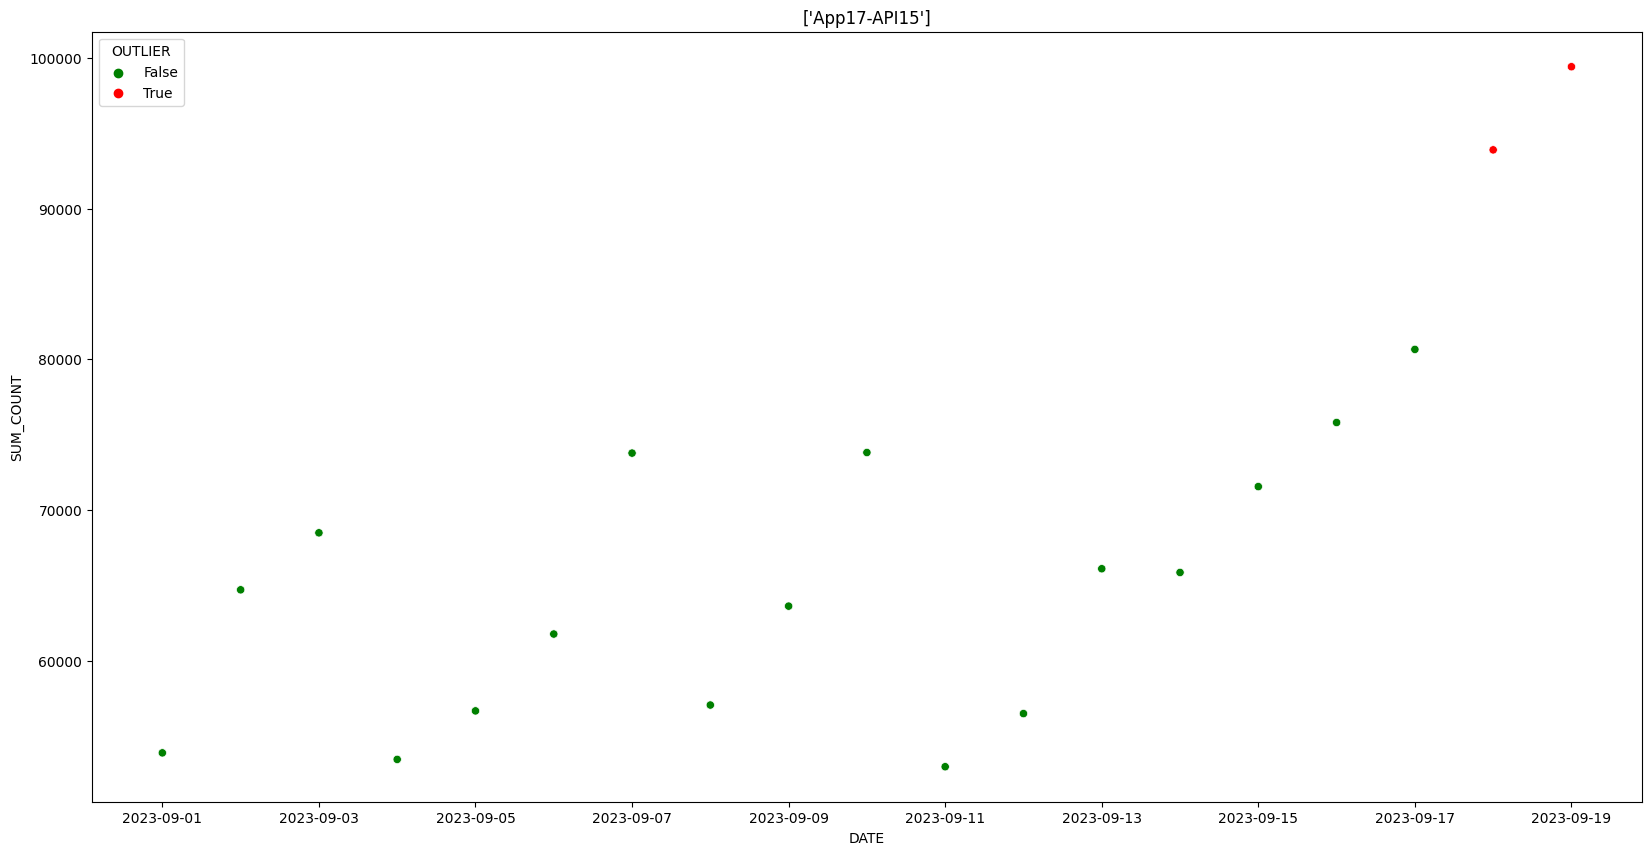

In [12]:
position = val_list.index(final_list[0])
df_gr = pro_df_list[key_list[position]]
df_gr = df_gr[(df_gr['DATE']>='2023-09-01') & (df_gr['DATE']<='2023-09-19')]
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_gr, x='DATE', y='SUM_COUNT', hue=df_gr.OUTLIER.astype(bool), palette=['green', 'red'])
plt.title(final_list[0])

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

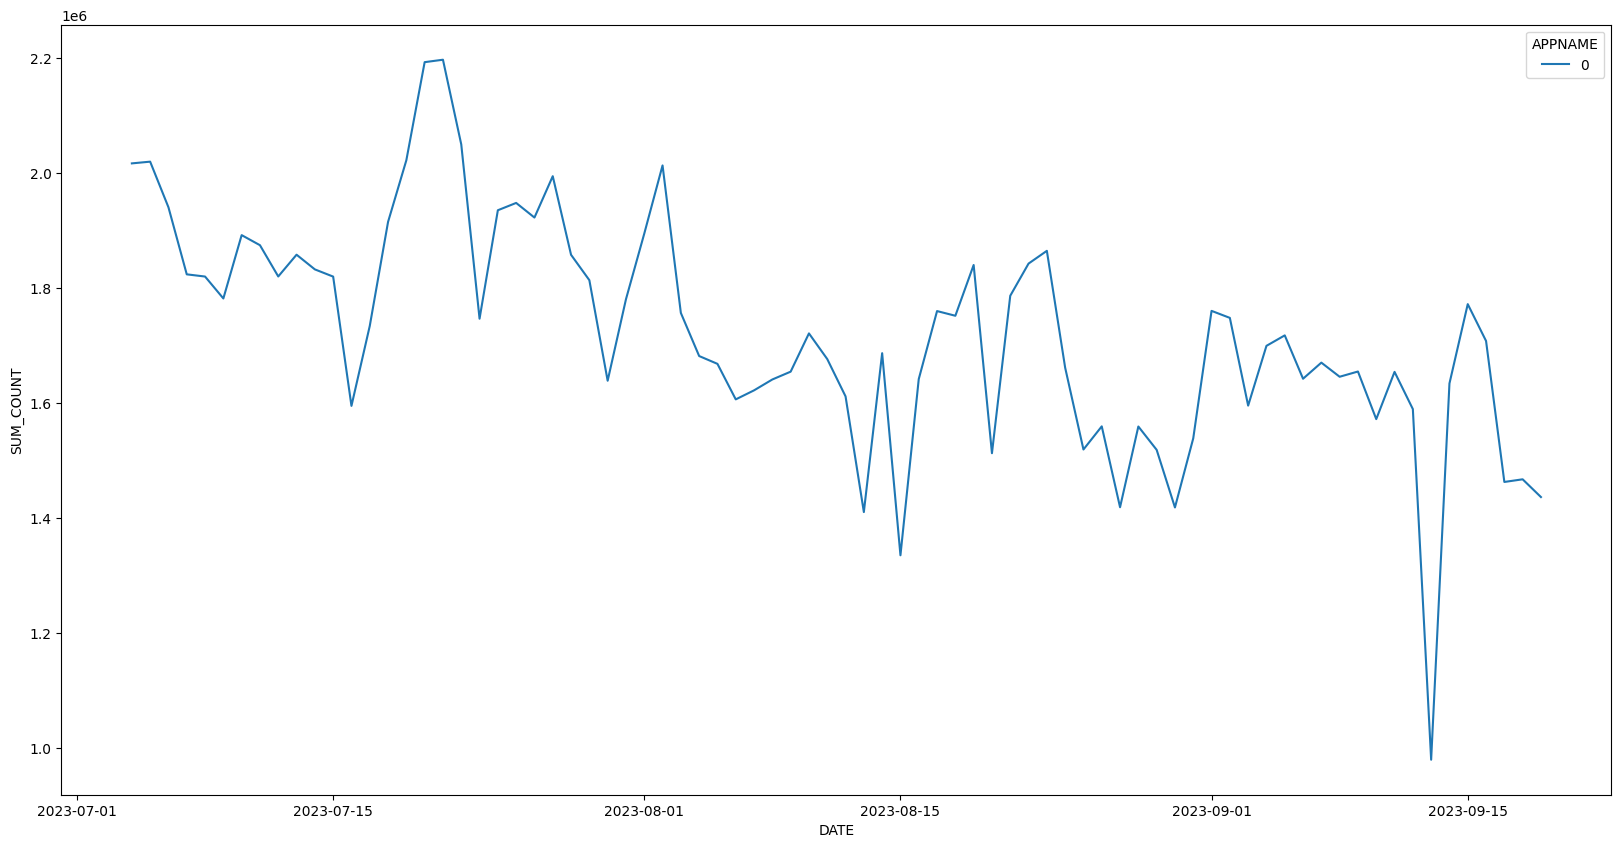

In [13]:
plt.figure(figsize=(20,10))
sns.lineplot(x='DATE', y='SUM_COUNT', hue='APPNAME', data=pro_data)
plt.show()

In [14]:
df_train = pro_data[pro_data['DATE']<'2023-08-15']
df_test = pro_data[(pro_data['DATE']>='2023-08-15')]
df_train.drop(['DATE'], axis=1, inplace=True)
df_train.drop(['ZS'], axis=1, inplace=True)
df_test.drop(['DATE'], axis=1, inplace=True)
df_test.drop(['ZS'], axis=1, inplace=True)

an_train = df_train['OUTLIER']
an_test = df_test['OUTLIER']

df_train.drop(['OUTLIER'], axis=1, inplace=True)
df_test.drop(['OUTLIER'], axis=1, inplace=True)


#df_imp.drop(['DATE'], axis=1, inplace=True)
#df_imp.drop(['ZS'], axis=1, inplace=True)
#an_imp = df_imp.drop(['OUTLIER'], axis=1, inplace=True)

C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\284859742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['DATE'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\284859742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['ZS'], axis=1, inplace=True)
C:\Users\Prime\AppData\Local\Temp\ipykernel_73284\284859742.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(

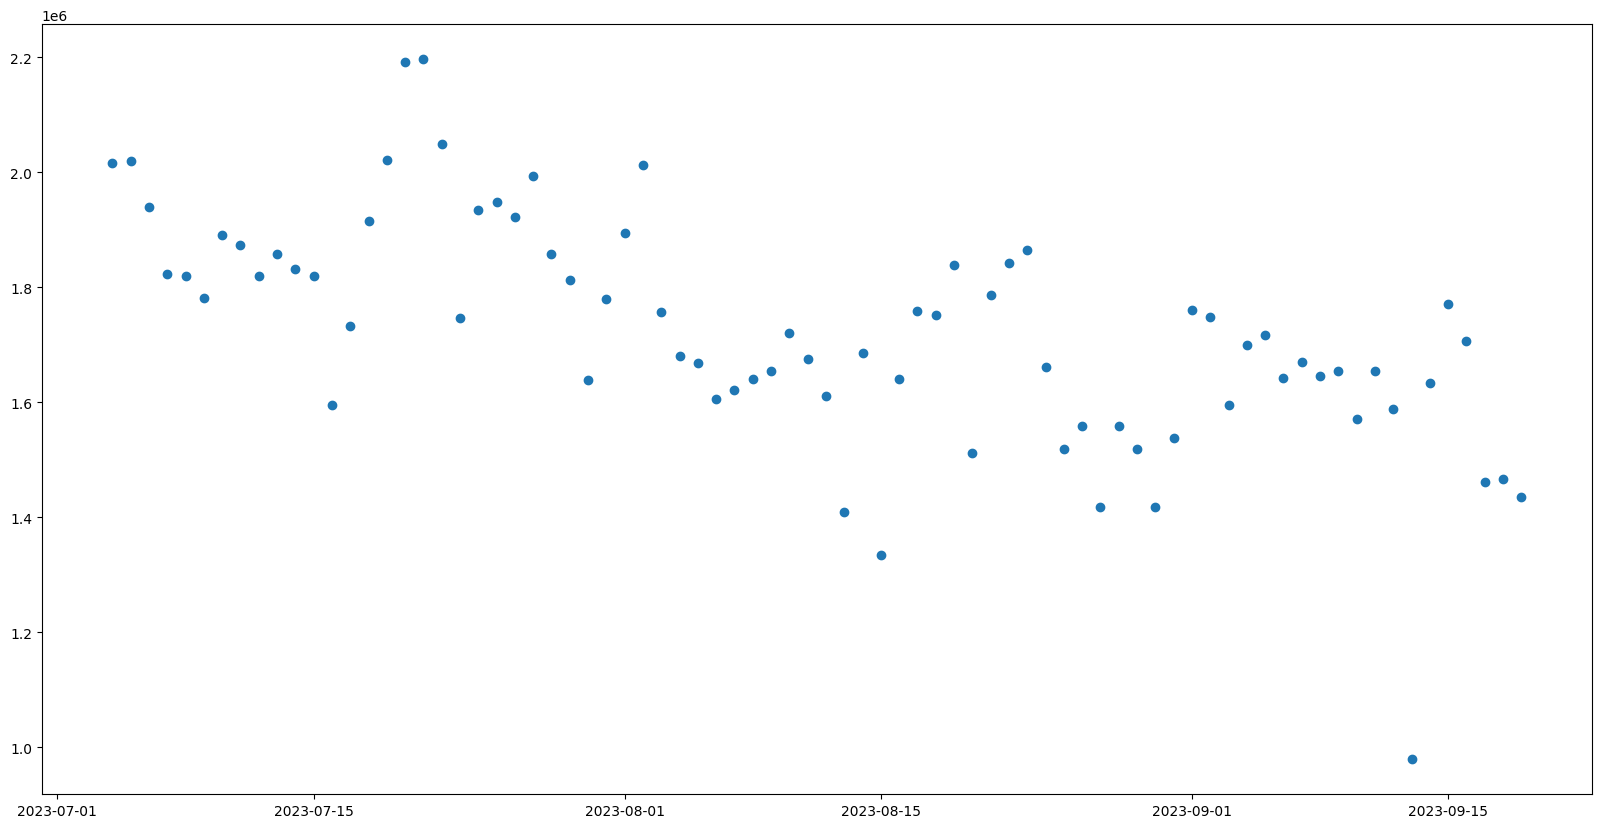

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(pro_data['DATE'], pro_data['SUM_COUNT'])
plt.show()

In [16]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.06)
iso_forest.fit(df_train, an_train)

y_pred_iso = iso_forest.predict(df_test)  # predicted labels
y_pred_iso_map = np.where(y_pred_iso == -1, 1, 0)

print(classification_report(an_test, y_pred_iso_map))  # Isolation forest report

cm_iso = confusion_matrix_iso = pd.crosstab(an_test, y_pred_iso_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_iso)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        35
           1       0.12      1.00      0.22         1

    accuracy                           0.81        36
   macro avg       0.56      0.90      0.56        36
weighted avg       0.98      0.81      0.87        36

Predicted   0  1
Actual          
0          28  7
1           0  1


In [17]:
df_final = df_test.copy()
df_final['OUTLIER'] = y_pred_iso_map
df_f_w = df_final[df_final['OUTLIER']==1]

c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

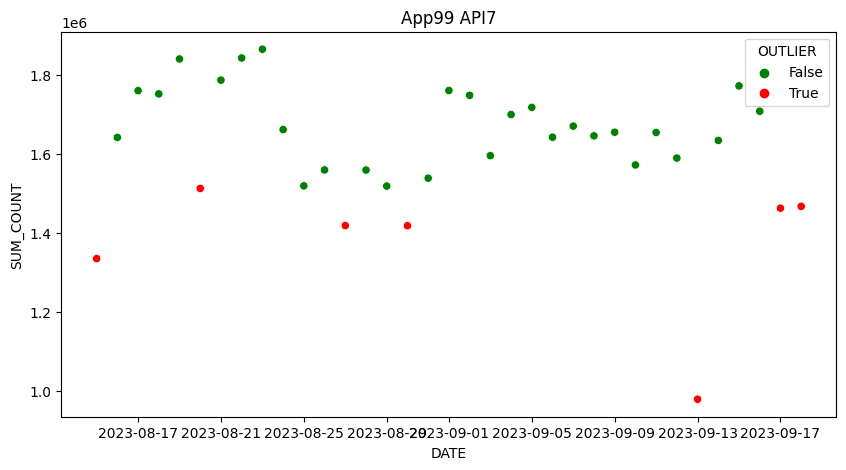

In [18]:
ind_df_f = pro_data.copy()
ind_df_f = ind_df_f[(ind_df_f['DATE']>='2023-08-15') & (ind_df_f['DATE']<'2023-09-19')]
ind_df_f.drop(['OUTLIER'], axis=1, inplace=True)
ind_df_f['OUTLIER'] = df_final.loc[ind_df_f.index]['OUTLIER']
li = ind_df_f['APPNAME'].index

if not (ind_df_f.OUTLIER.sum() == 0):
    #if not (ind_df_f[ind_df_f['DATE'] == '2023-09-19'][ind_df_f['OUTLIER'] == 1].empty):
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=ind_df_f, x='DATE', y='SUM_COUNT', hue=ind_df_f.OUTLIER.astype(bool), palette=['green', 'red'])
        plt.title(str(pro_df.loc[li[0]]['APPNAME']) + ' ' + str(pro_df.loc[li[0]]['API']))

In [19]:
# One-Class SVM
one_class_svm = OneClassSVM(nu=0.05, kernel= 'rbf', gamma=0.05)
one_class_svm.fit(df_train, an_train)

y_pred_svm = one_class_svm.predict(df_test)  # predicted labels
y_pred_svm_map = np.where(y_pred_svm == -1, 1, 0)

print(classification_report(an_test, y_pred_svm_map))  # One-Class SVM report

cm_svm = confusion_matrix_svm = pd.crosstab(an_test, y_pred_svm_map, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.03      1.00      0.05         1

    accuracy                           0.03        36
   macro avg       0.01      0.50      0.03        36
weighted avg       0.00      0.03      0.00        36

Predicted   1
Actual       
0          35
1           1


c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(df_train, an_train)

y_pred_rf = rf.predict(df_test)  # predicted labels

print(classification_report(an_test, y_pred_rf))  # Random Forest report

cm_rf = confusion_matrix_rf = pd.crosstab(an_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix_rf)


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.00      0.00      0.00         1

    accuracy                           0.97        36
   macro avg       0.49      0.50      0.49        36
weighted avg       0.95      0.97      0.96        36

Predicted   0
Actual       
0          35
1           1


c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Prime\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [21]:
y_predict_rf = rf.predict(df_imp)
y_predict_rf

NameError: name 'df_imp' is not defined

In [ ]:
final_list

[array(['App17-API15'], dtype=object),
 array(['App17-API7'], dtype=object),
 array(['App3-API15'], dtype=object),
 array(['App32-API19'], dtype=object),
 array(['App57-API7'], dtype=object),
 array(['App60-API15'], dtype=object),
 array(['App73-API12'], dtype=object),
 array(['App89-API15'], dtype=object),
 array(['App89-API12'], dtype=object),
 array(['App95-API10'], dtype=object)]